,test,sensor,datatype,lvl,try,duration,significant axis,+ve actions,-ve actions,+ve peak height,-ve peak height,+ve peak width,-ve peak width
0,hmove,forearm,Accelerometer,0,1,6.975,y,27,22,0.544321,-0.505379,0.227808,0.267857
1,hmove,forearm,Accelerometer,0,2,6.778,y,22,7,0.529818,-0.445143,0.274429,0.871333
2,hmove,forearm,Accelerometer,0,3,7.493,y,25,8,0.500973,-0.475917,0.266625,0.485714
3,hmove,forearm,Gyroscope,0,1,6.977,y,35,37,85.573867,-91.095649,0.182971,0.178861
4,hmove,forearm,Gyroscope,0,2,6.778,y,34,32,79.792137,-79.817281,0.198152,0.208387
5,hmove,forearm,Gyroscope,0,3,7.492,y,37,35,74.637477,-87.981057,0.172806,0.198735
6,hmove,wrist,Accelerometer,0,1,6.479,z,27,25,0.552333,-0.669640,0.223231,0.239333
7,hmove,wrist,Accelerometer,0,2,6.976,z,21,24,0.535905,-0.531903,0.316000,0.270478
8,hmove,wrist,Accelerometer,0,3,8.784,z,15,14,0.492689,-0.486738,0.540857,0.584077
9,hmove,wrist,Gyroscope,0,1,6.479,y,15,25,133.851044,-119.206973,0.373357,0.242625


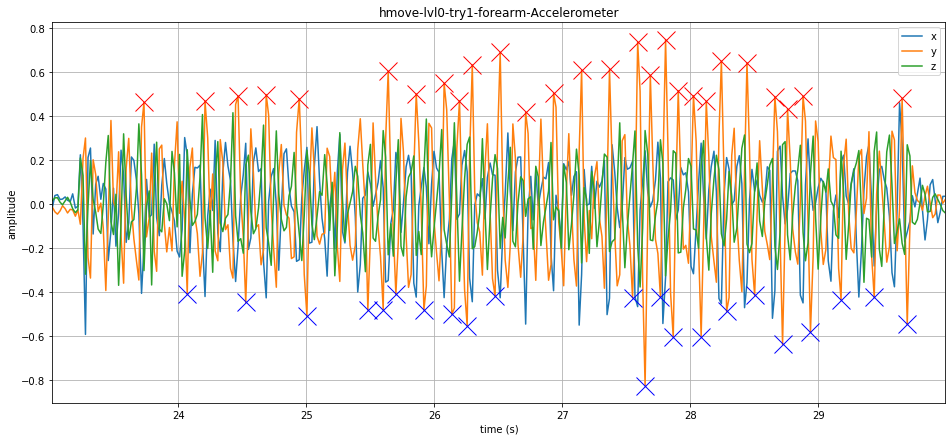

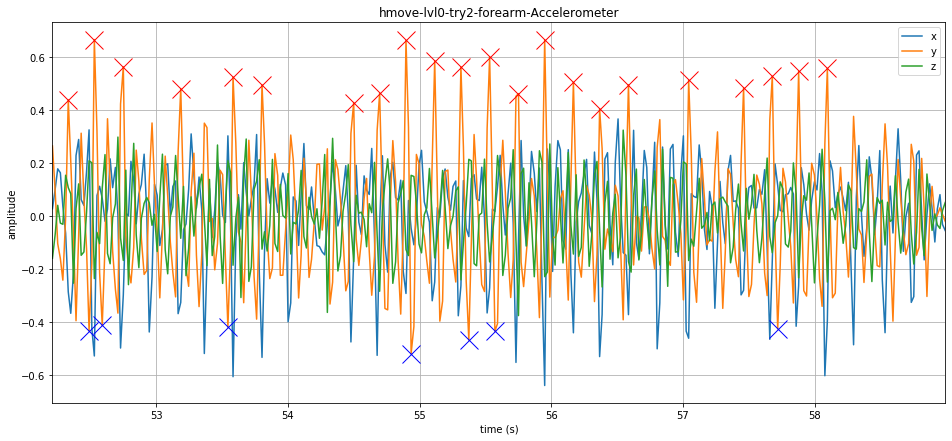

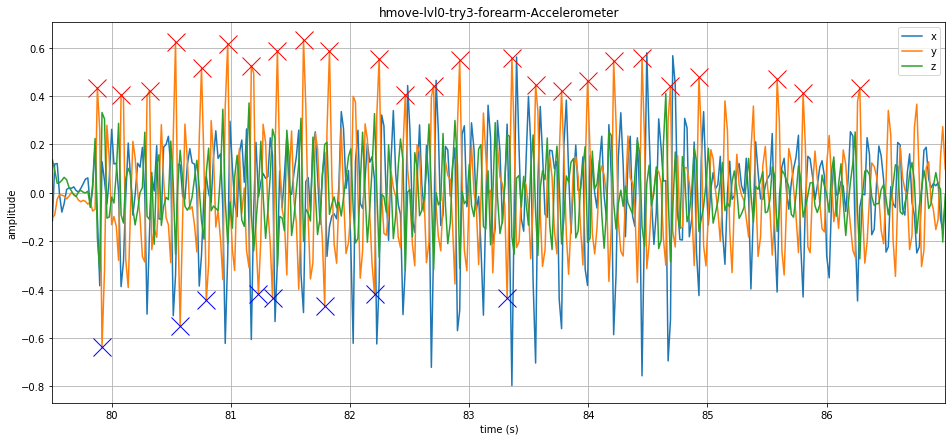

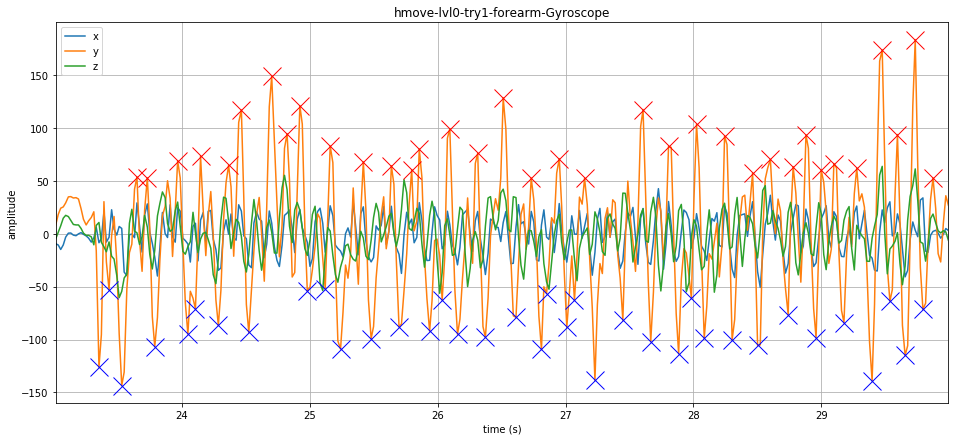

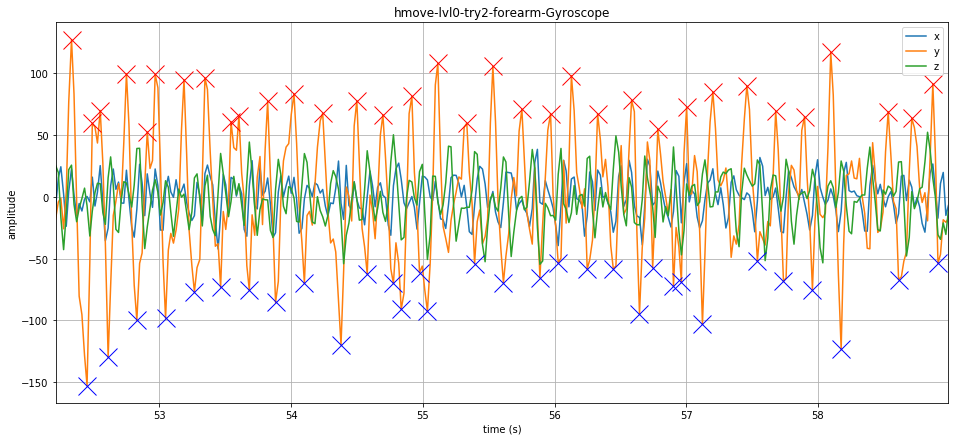

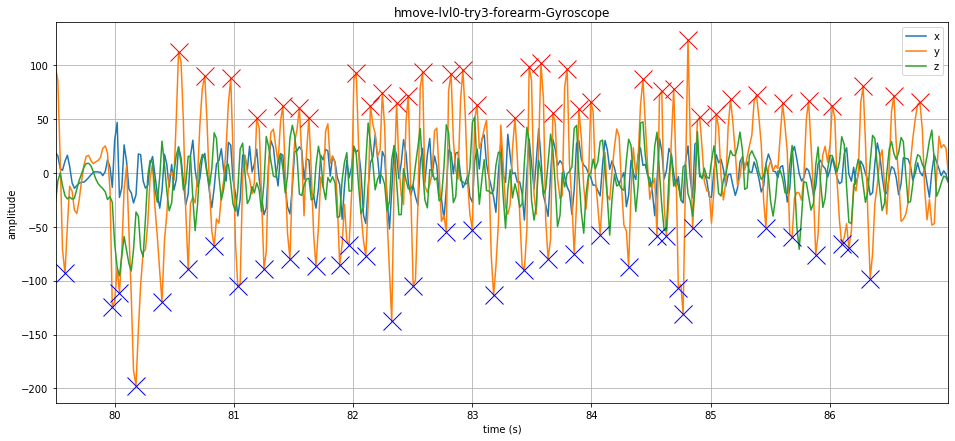

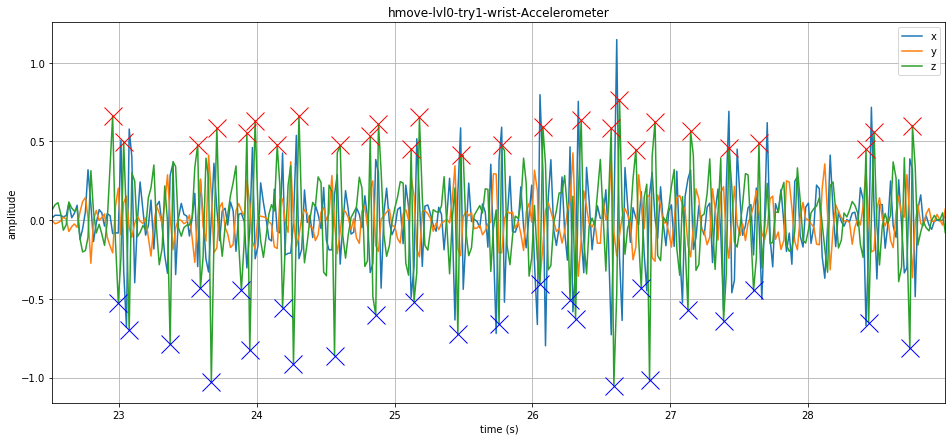

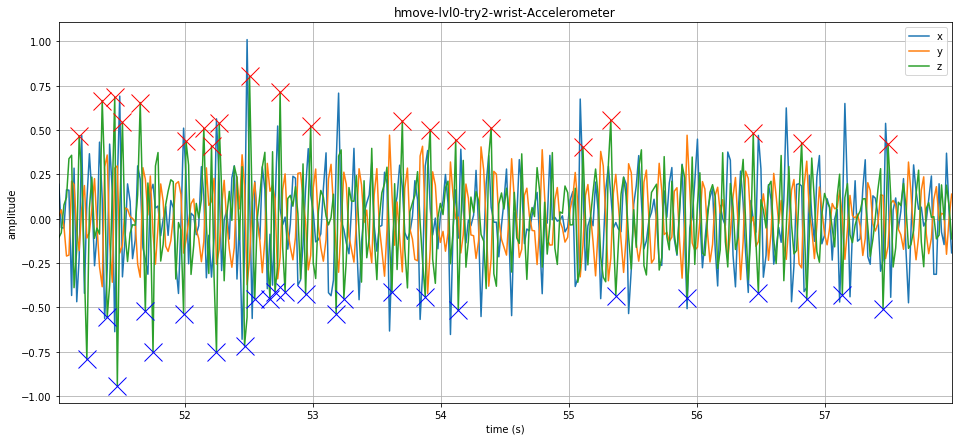

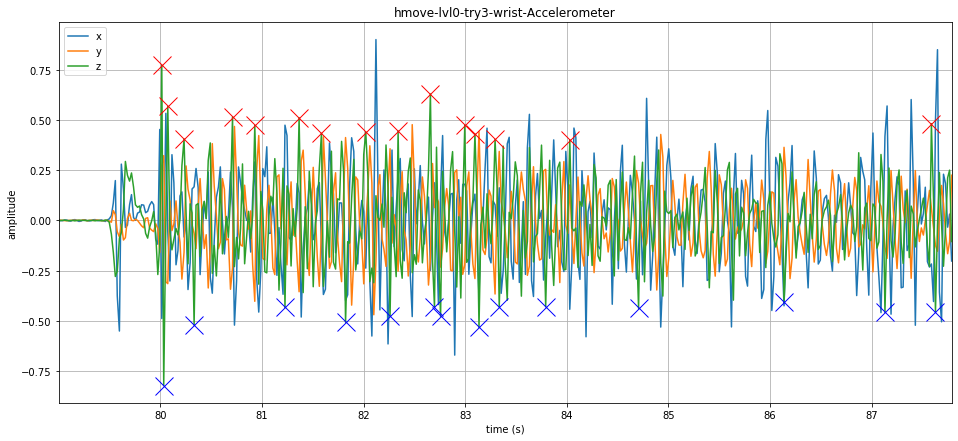

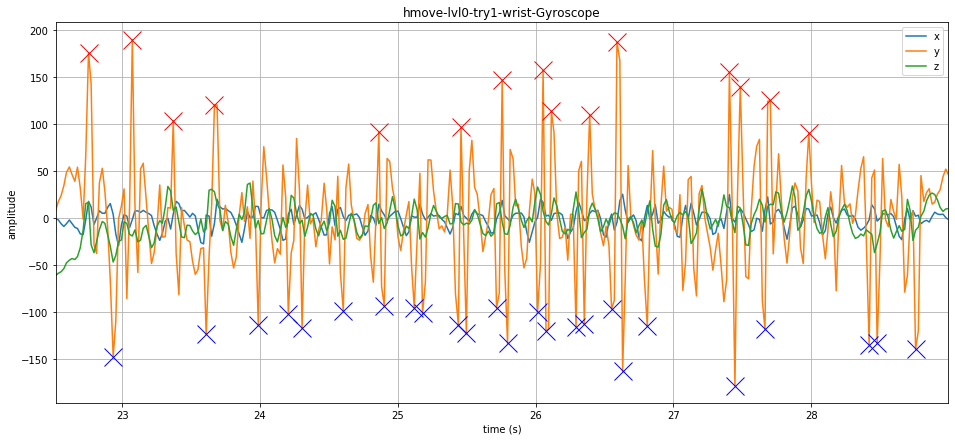

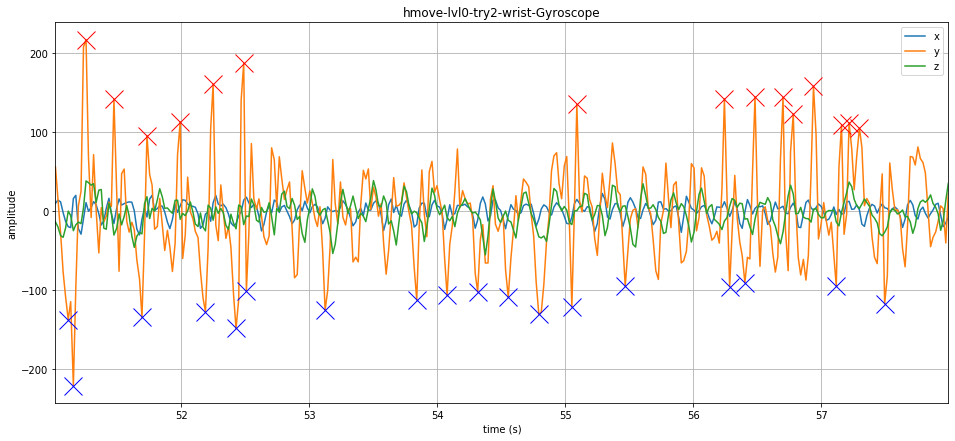

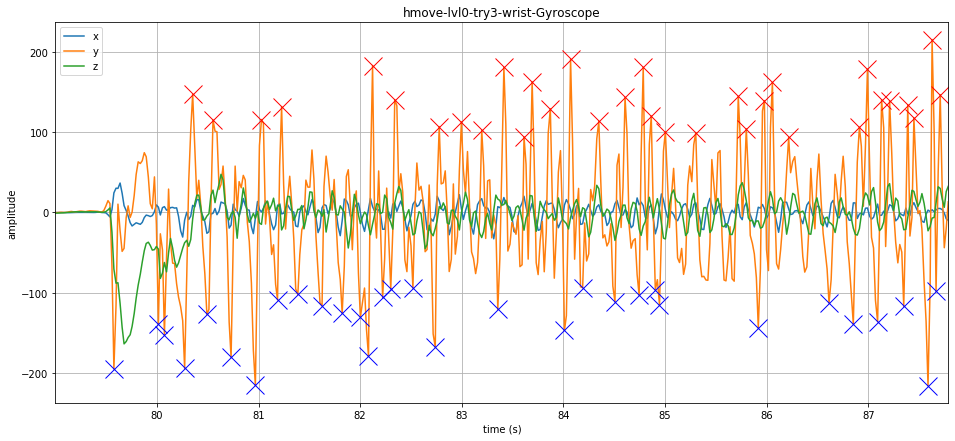

In [3]:
from os import listdir
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def cal_mean(c):
    # calculate mean of 3 different tries
    return np.around(np.add.reduceat(c, np.arange(0, len(c), 3))/3,3).round(1)
    
def cal_magnitude(df, file, window):
    # combine triaxial data into one singular magnitude data
    if 'Accelerometer' in file:
        df['x'] = df.loc[window-1:,'x-axis (g)']-df['x-axis (g)'].rolling(window).mean()[window-1:]
        df['y'] = df.loc[window-1:,'y-axis (g)']-df['y-axis (g)'].rolling(window).mean()[window-1:]
        df['z'] = df.loc[window-1:,'z-axis (g)']-df['z-axis (g)'].rolling(window).mean()[window-1:]
        df['magnitude'] = df['x']**2 + df['y']**2 + df['z']**2
        df['magnitude'] = (df['magnitude'].apply(math.sqrt))*9.81
        
    elif 'Gyroscope' in file:
        df['x'] = df.loc[window-1:,'x-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
        df['y'] = df.loc[window-1:,'y-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
        df['z'] = df.loc[window-1:,'z-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
        df['magnitude'] = df['x']**2 + df['y']**2 + df['z']**2
        df['magnitude'] = df['magnitude'].apply(math.sqrt)
        
    return df

def find_peaks_and_troughs(title, df):
    if 'ftap' in title:
        if 'Accelerometer' in title: col,h = 'z',.1
        elif 'Gyroscope' in title:   col,h = 'y',10
            
    elif 'hmove' in title:
        if 'forearm' in title:
            if 'Accelerometer' in title: col,h = 'y',.4
            elif 'Gyroscope' in title:   col,h = 'y',50
        elif 'wrist' in title:
            if 'Accelerometer' in title: col,h = 'z',.4
            elif 'Gyroscope' in title:   col,h = 'y',90
            
    elif 'leag' in title:
        if 'calf&heel' in title:
            if 'Accelerometer' in title: col,h = 'y',.7
            elif 'Gyroscope' in title:   col,h = 'y',70
        elif 'heel' in title:
            if 'Accelerometer' in title: col,h = 'y',.9
            elif 'Gyroscope' in title:   col,h = 'y',50
            
    elif 'prosup' in title:
        if 'Accelerometer' in title: col,h = 'x',1
        elif 'Gyroscope' in title:   col,h = 'y',200
                
    elif 'ttap' in title:
        if 'forearm' in title:
            if 'Accelerometer' in title: col,h = 'x',.25
            elif 'Gyroscope' in title:   col,h = 'y',100
        elif 'wrist' in title:
            if 'Accelerometer' in title: col,h = 'x',.4
            elif 'Gyroscope' in title:   col,h = 'y',100
                
    elif 'tugt' in title:
        if 'heel' in title:
            if 'Accelerometer' in title: col,h = 'x',1.5
            elif 'Gyroscope' in title:   col,h = 'y',200
        elif 'waist' in title:
            if 'Accelerometer' in title: col,h = 'x',.4
            elif 'Gyroscope' in title:   col,h = 'y',100
                
    else:
        col,h = 'z',0
    
    p, p_prop = signal.find_peaks(df[col], height=h)
    t, t_prop = signal.find_peaks(-df[col], height=h)
    time_p = [df.loc[i,'elapsed (s)'] for i in p]
    p_plot = [df.loc[i,col] for i in p]
    time_t = [df.loc[i,'elapsed (s)'] for i in t]
    t_plot = [df.loc[i,col] for i in t]
    
    return time_p, p_plot, time_t, t_plot, col

def plt_individual_graphs(df_main, title, time_p, p_plot, time_t, t_plot):
    fig_size = (16,7)
    
    df = df_main#[80:180]
    df.reset_index(drop=True, inplace=True)

    ax1=df.plot(x='elapsed (s)', y=['x','y','z'],
                grid=True, figsize=fig_size, title=title)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('amplitude')

    ax1.plot(time_p, p_plot, 'rx', markersize=18)
    ax1.plot(time_t, t_plot, 'bx', markersize=18)

# MAIN FUNCTION
def main(path='/', window=3, truncate=None, info=None, counter=[0,0,0,0], axes=[]):
    filenames = [filename for filename in listdir(path) if filename.endswith('.csv')]
    
    for i in range(len(filenames)):
        file = filenames[i]
        title_main = file.split('_')[0]

        # extract dataframe
        df_main = pd.read_csv(path + file)

        # combine triaxial data into one singular magnitude data
        df_main = cal_magnitude(df_main, file, window)
        
        # extract umbrella curve
        df_main['max'] = df_main['magnitude'].rolling(30).max()
        
        if ('hmove' in title_main) and ('lvl0' in title_main):
            for test in range(3):
                # include tries in title
                title = (title_main.split('-')[0] + '-' + title_main.split('-')[1] + 
                         '-try' + str(test+1) + '-' + title_main.split('-')[2] + 
                         '-' + file.split('_')[4])

                # truncate signal beyond start and end times
                if (truncate is not None) and (truncate[i][test] != ()):
                    df = df_main[(df_main['elapsed (s)'] <= truncate[i][test][1]) & 
                                 (df_main['elapsed (s)'] >= truncate[i][test][0])]
                    df.reset_index(inplace=True)
                else:
                    df = df_main

                # find peaks and troughs in signal
                time_p, p_plot, time_t, t_plot, col = find_peaks_and_troughs(title, df)

                info = info.append({
                    'test': title_main.split('-')[0],
                    'sensor': title_main.split('-')[2],
                    'datatype': file.split('_')[4],
                    'lvl': int(title_main.split('-')[1][-1]),
                    'try': test+1,
                    'duration': df.loc[len(df)-1,'elapsed (s)']-df.loc[0,'elapsed (s)'],
                    'significant axis': col,
                    '+ve actions': len(time_p),
                    '-ve actions': len(time_t),
                    '+ve peak height': np.mean(p_plot),
                    '-ve peak height': np.mean(t_plot),
                    '+ve peak width': np.mean(np.diff(time_p)),
                    '-ve peak width': np.mean(np.diff(time_t))
                },ignore_index=True)

                # ONLY UNCOMMENT WHEN PLOTTING GRAPHS
                plt_individual_graphs(df, title, time_p, p_plot, time_t, t_plot)
    
    return info

cols = ['test','sensor','datatype','lvl','try','duration','significant axis',
        '+ve actions','-ve actions',
        '+ve peak height','-ve peak height','+ve peak width','-ve peak width']

info = main(path='Motion Data/',#'Patient001-2019-12-05/',
          truncate = [
                      # ftap lvl0
                      [(22.7,34),(50.4,62),(78,89)],[(22.7,34),(50.4,62),(78,89)],
                      [(36,46),(68,78.8),(95,106)],[(36,46),(68,78.8),(95,106)],
                      # ftap lvl1
                      [(20.5,32),(54,65),(86,97.5)],[(20.5,32),(54,65),(86,97.5)],
                      [(25,38),(62,73),(94.3,106)],[(25,38),(62,73),(94.3,106)],
                      # ftap lvl2
                      [(26.5,37),(58.8,67.2),(92,102.5)],[(26.5,37),(58.8,67.2),(92,102.5)],
                      [(23,37.5),(61,72),(95,108)],[(23,37.5),(61,72),(95,108)],
                      # ftap lvl3
                      [(),(),()],[(),(),()],
                      [(),(),()],[(),(),()],
                      # ftap lvl4
                      [(),(),()],[(),(),()],
                      [(),(),()],[(),(),()],

                      # hmove lvl0
                      [(23,30),(52.2,59),(79.5,87)],[(23,30),(52.2,59),(79.5,87)],
                      [(22.5,29),(51,58),(79,87.8)],[(22.5,29),(51,58),(79,87.8)],
                      # hmove lvl1
                      [(),(),()],[(),(),()],
                      [(),(),()],[(),(),()],
                      # hmove lvl2
                      [(),(),()],[(),(),()],
                      [(),(),()],[(),(),()],
                      # hmove lvl3
                      [(),(),()],[(),(),()],
                      [(),(),()],[(),(),()],
                      # hmove lvl4
                      [(),(),()],[(),(),()],
                      [(),(),()],[(),(),()],

                      # leag lvl0
                      [(10,18.5),(25,32),(39,45)],[(10,18.5),(25,32),(39,45)],
                      [(13,19),(29,35.5),(43.5,49)],[(13,19),(29,35.5),(43.5,49)],

                      # prosup lvl0
                      [(22.5,28.5),(49.5,57.8),(78.5,89)],[(22.5,28.5),(49.5,57.8),(78.5,89)],
                      [(23.5,30.9),(51.5,61),(82,90.7)],[(23.5,30.9),(51.5,61),(82,90.7)],

                      # tota lvl0
                      [(),(),()],[(),(),()],
                      [(),(),()],[(),(),()],

                      # ttap lvl0
                      [(21,31.5),(51,62),(83.4,92.5)],[(21,31.5),(51,62),(83.4,92.5)],
                      [(24,36),(56.5,67.5),(88,99)],[(24,36),(56.5,67.5),(88,99)],
                      # ttap lvl1
                      [(),(),()],[(),(),()],
                      [(),(),()],[(),(),()],
                      # ttap lvl2
                      [(),(),()],[(),(),()],
                      [(),(),()],[(),(),()],
                      # ttap lvl3
                      [(),(),()],[(),(),()],
                      [(),(),()],[(),(),()],
                      # ttap lvl4
                      [(),(),()],[(),(),()],
                      [(),(),()],[(),(),()],

                      # tugt lvl0
                      [(11,20),(30,39),(49,57)],[(11,20),(30,39),(49,57)],
                      [(11,21),(30,40),(49,58)],[(11,21),(30,40),(49,58)],
                      # tugt lvl1
                      [(),(),()],[(),(),()],
                      # tugt lvl2
                      [(),(),()],[(),(),()]
                      ],
          info=pd.DataFrame(columns=cols))

info